**Retail Promotion Classification-Prediction Problem**

Through this project, we are aiming to use retail sales data to understand how the stores could run a promotional campaign targeting specific customer profiles.

This project would allow retail stores, particularly one without a lot of resources dedicated to promotional material, to optimize their promotional campaigns by identifying the most effective customer profiles to target with their marketing efforts. This approach can save retailers significant resources and effort by avoiding a standarized approach to promotions, which can be less effective and less efficient. Instead, stores can target specific customer segments based on their preferences in shopping categories, past purchasing behaviors, and other factors to maximize the effectiveness of their promotions.

Data Source: https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset

***Step 1: Data Cleaning and Preprocessing***

Imports

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [17]:
df = pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


Creating a new calculated column total which just calculates the total amount spent by that person by doing price * quantity

In [19]:
df['Total'] = (df['price'] * df['quantity'])
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


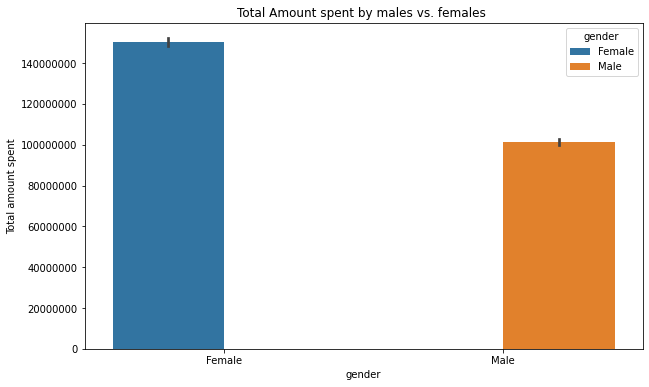

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(df,x='gender',y='Total',hue = 'gender',estimator = sum)
plt.ylabel('Total amount spent')
plt.title('Total Amount spent by males vs. females ')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

Text(0.5, 1.0, 'Category Wise Shopping')

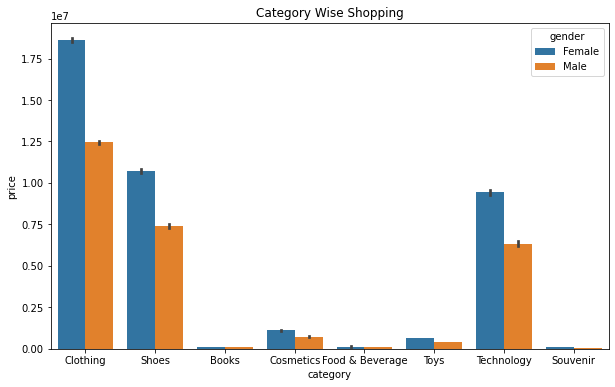

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(df,x='category',y='price',hue = 'gender',estimator = sum)
plt.title('Category Wise Shopping')

Starting the Machine Learning Process 

In [24]:
# Choose relevant columns for predictions
df_to_train = df[['gender', 'category', 'age', 'Total']]

In [25]:
df_to_train.head()

,gender,category,age,Total
0,Female,Clothing,28,7502.00
1,Male,Shoes,21,5401.53
2,Male,Clothing,20,300.08
3,Female,Shoes,66,15004.25
4,Female,Books,53,242.40


In [30]:
def age_to_categories(x):
    if (x<=20):
        return '0-20'
    elif ((x>20) & (x<=30)):
        return '20 to 30'
    elif ((x>30) & (x<=40)):
        return '30 to 40'
    elif ((x>40) & (x<50)):
        return '40 to 50'
    elif ((x>50) & (x<60)):
        return '50 to 60'
    else:
        return '> 60'
df_to_train['age_group'] = df['age'].apply(age_to_categories)

/var/folders/bf/7xcdz0ts5pj314jx9d2_0y640000gn/T/ipykernel_16136/3305736314.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_train['age_group'] = df['age'].apply(age_to_group)


In [31]:
df_to_train.head()

,gender,category,age,Total,age_group
0,Female,Clothing,28,7502.00,20 to 30
1,Male,Shoes,21,5401.53,20 to 30
2,Male,Clothing,20,300.08,0-20
3,Female,Shoes,66,15004.25,> 60
4,Female,Books,53,242.40,50 to 60
